# <center>Challenge Problem<center>
<center>Fan Yang</center>
<center>UNI: fy2232</center>
<center>02/28/2018</center>

## 1. Create data

In [2]:
Socio_tab <- c(rep("Low",4), rep("Medium",4), rep("High",4))
Boyscout_tab <- rep(c(rep("Yes",2),rep("No",2)),3)
delinquency_tab <- rep(c("Yes","No"),6)
frequency <- c(10,40,40,160,18,132,18,132,8,192,2,48)
Socioeconomic <- factor(c(rep(Socio_tab[1:12],frequency[1:12])))
Boyscout <- factor(c(rep(Boyscout_tab[1:12],frequency[1:12])))
delinquency <- factor(c(rep(delinquency_tab[1:12],frequency[1:12])))

Now we get 3 variables named ***Socioeconomic***, ***Boyscout*** and ***delinquency***. They all have **800** observations. *Socioeconomic* has 3 levels( "Low", "Medium" and "High") while *Boyscout* and *delinquency* both have two levels( "Yes" and "No").

## 2. exploratory data analysis

### Graphical descriptive statistics

First let's draw pair-wise comparisons of the three variables.

The below three plots are pair-wise comparisons of *"Socioeconomic-Boyscout"*, *"Socioeconomic-delinquency"* and *"Boyscout-delinquency"*. In each plot, the dark bars reprensent "No" for y-axis while the bright bars represent "Yes" for y-axis. And the width of each bar in each plot stands for the number of corresponding group. We can easily find that the 3 levels of Socioeconomic have similar number of observations.

We can draw conclusion from below plots:<br>
(1). For the comparision of *"Socioeconomic-Boyscout"*, response of Boyscout influenced significantly by the levels of Socioeconomic.<br>
(2). For the other comparisons, different levels do not show significant differences.

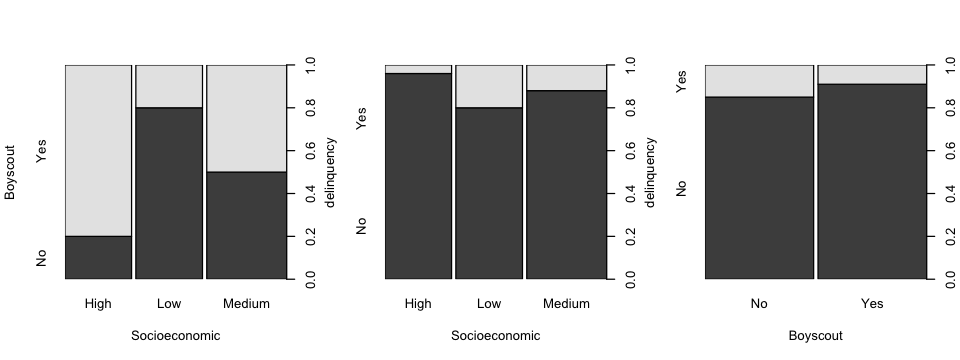

In [2]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
plot(Socioeconomic,Boyscout,xlab="Socioeconomic",ylab="Boyscout")
plot(Socioeconomic,delinquency,xlab="Socioeconomic",ylab="delinquency")
plot(Boyscout,delinquency,xlab="Boyscout",ylab="delinquency")

### Numerical descriptive statistics

Denote $x_1:\text{Socioeconomic status; }
~x_2:\text{Boy scout; }
~x_3:\text{delinquency.}$

Now let's use logistic regression to determine the relationship between the 3 variables.

<center>$\text{logit}(\pi(x_1|x_2,x_3)) = \beta_0 + \beta_1x_2+\beta_2x_3$

**Socioeconomic** vs **Boyscout** + **delinquency**

Since Socioeconomic is a ordinal categorical variable with 3 hierarchies: "Low", "Medium" and "High". We now use **multinomial logistic regression model**.

From the below above, we get the fitted model as:
$$
\log\left(\frac{\hat{\pi}_{\text{High}}}{\hat{\pi}_{\text{Low}}}\right)
=-1.1164-0.8038x_2+0.3526x_3\\
\log\left(\frac{\hat{\pi}_{\text{Low}}}{\hat{\pi}_{\text{Medium}}}\right)
=0.2403-0.8038x_2+0.3526x_3
$$

In [3]:
library(MASS)
polr.cred<-polr(Socioeconomic~Boyscout+delinquency) 
summary(polr.cred)$coefficients


Re-fitting to get Hessian



,Value,Std. Error,t value
BoyscoutYes,-0.8037657,0.13459568,-5.971705
delinquencyYes,0.3526039,0.19354302,1.821838
High|Low,-1.1163846,0.10467675,-10.665068
Low|Medium,0.2403070,0.09648995,2.490487


Use can **use** $\mathbf{\chi^2}$ **test** ( **Likelihood Ratio Test** ) to check the significance of our model.

In [4]:
drop1(polr.cred,test="Chi")

,Df,AIC,LRT,Pr(>Chi)
<none>,NA,1717.873,NA,NA
Boyscout,1,1752.126,36.252338,1.733520e-09
delinquency,1,1719.220,3.347117,6.732282e-02


Notice that the p-value for coefficients of Boyscout is very small, say less than 0.01. While p-value for coefficients of delinquency is greater than 0.05. Therefore under $\alpha=0.05$ and "$H_0$: $\beta_2=0$ vs $H_A$: otherwise", we fail to reject $H_0$ and conclude that $\beta_2=0$.

**use AIC for model selection**

In [5]:
step(polr.cred,direction = "backward")$anova

Start:  AIC=1717.87
Socioeconomic ~ Boyscout + delinquency

              Df    AIC
<none>           1717.9
- delinquency  1 1719.2
- Boyscout     1 1752.1


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,796,1709.873,1717.873


In the above output, when we delete delinquency in the model, the AIC is 1719.2 which is very similar to the full model. According to Likelihood Ratio Test and AIC, we can remove delinquency and refit the model.<br>

**refit model**

In [6]:
polr.fit<-polr(Socioeconomic~Boyscout) 
summary(polr.fit)$coefficients


Re-fitting to get Hessian



,Value,Std. Error,t value
BoyscoutYes,-0.8243628,0.13416508,-6.144392
High|Low,-1.1707291,0.10052016,-11.646710
Low|Medium,0.1812920,0.09089892,1.994435


From the below above, we get the fitted model as:
$$
\log\left(\frac{\hat{\pi}_{\text{High}}}{\hat{\pi}_{\text{Low}}}\right)
=-1.1707291	-0.8243628x_2
\tag{1}$$
$$
\log\left(\frac{\hat{\pi}_{\text{Low}}}{\hat{\pi}_{\text{Medium}}}\right)
=0.1812920-0.8243628x_2
\tag{2}$$

## Summary

In this report, we first draw pair-wise comparison of the three variables. And in view of graph we find that only Boy scout and Socioeconomic Status have some correlation. The number of levels of Socioeconomic differ at different levels of Boy scout.<br>
Then we conduct Numerical descriptive statistics. Our main model is **Multinomial Logistic Regression Model**. Set response variable as Socioeconomic and other two as predictor variables. In the first fitted model, we conduct $\chi^2$ test to determine<br>
<center>$H_0$: $\beta_2=0~$  vs  $~H_A$: otherwise
    
where $\beta_2$ is the coefficient of delinquency.<br> Then we get the p-value is 6.732282e-02 and under $\alpha=0.05$, we fail to reject $H_0$ and conclude that $\beta_2=0$. Therefore we delete the variable **delinquency** and refit the model.

And get our final model as below:
$$\text{logit}(\pi(x_1|x_2)) = \beta_0 + \beta_1x_2$$<br>
where $\pi()$ is computed in (1) and (2)
and response variable is Socioeconomic and predictor($x_2$) is Boy scout.